In [2]:
%pip install scikit-learn
%pip install ipywidgets
%pip install matplotlib

# For Plotly
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.11-py3-none-any.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ---------------------------------------- 165.9/165.9 kB ? eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.5/8.0 MB 46.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.0/8.0 MB 42.3 MB/s eta 0:00:01
   -----------------------

In [4]:
%pip install tqdm

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


# Initialize

In [1]:
import csv
import json
import os

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [15]:
records = sorted(os.listdir('../data/'))
records = [os.path.join('../data/', record) for record in records if record.endswith('.csv')]
records

['../data/member-voting-record-2006-2010.csv',
 '../data/member-voting-record-2010-2014.csv',
 '../data/member-voting-record-2014-2018.csv',
 '../data/member-voting-record-2018-2022.csv',
 '../data/member-voting-record-2022-2026.csv']

# Table conversion

Currently, each row in the voting record files corresponds to a single councillor and their vote on an item.  
We want to make it so that each row is instead a councillor, and the columns correspond to a how they voted for an item.

In [16]:
# Read each file
rows = {}  # Councillor[str] -> Votes[list]
indices = {}  # Voting item[str] -> Index[int]
next_index = 0

# First pass: Obtain set of Agenda Items
for filename in tqdm(records, desc='Loading Agenda Items', position=0):
    with open(filename, 'r', encoding='utf-8', newline='') as file:
        reader = csv.DictReader(file)
        for row in tqdm(reader, position=1):
            assert row['Agenda Item #'], row
            if row['Agenda Item #'] not in indices:
                indices[row['Agenda Item #']] = next_index
                next_index += 1
print("Found", len(indices), "unique Agenda Items.")

# Second pass: Obtain councillor votes
for filename in tqdm(records, desc='Loading Councillor Votes', position=0):
    with open(filename, 'r', encoding='utf-8', newline='') as file:
        reader = csv.DictReader(file)
        for row in tqdm(reader, position=1):

            assert row['First Name'], row
            assert row['Last Name'], row
            assert row['Vote'], row

            name = f"{row['First Name'].strip()} {row['Last Name'].strip()}"
            index = indices[row['Agenda Item #']]

            # Merge Michelle Berardinetti into Michelle Holland
            if name == 'Michelle Berardinetti':
                name = 'Michelle Holland'

            # Initialize councillor
            """
            Method 1:
                Yes: 1.0
                No: 0.0
                Absent: -1.0
                N/A: -1.0 (similar results with -2)

            Method 2:
                Yes: 1.0
                No: 0.0
                Absent: 0.5
                N/A: -1.0

            Method 3:
                Yes: 1.0
                No: 0.0
                Absent: 0.5
                N/A: 0.5
            """
            if name not in rows:
                # Use -1 like 'Absent'
                rows[name] = [-1. for __ in range(len(indices))]  # Tested with -2, and results are almost exactly the same

            # Store vote
            if row['Vote'] == 'Yes':
                rows[name][index] = 1.
            elif row['Vote'] == 'No':
                rows[name][index] = 0.
            elif row['Vote'] == 'Absent':
                rows[name][index] = -1.
            else:
                raise ValueError(f"Invalid vote type: {row['Vote']}")
print("Done.")

Loading Agenda Items:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Found 8838 unique Agenda Items.


Loading Councillor Votes:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Done.


In [17]:
# Correct encoding issue with Ana Bailão
rows['Ana Bailão'] = rows['Ana BailÃ£o']
del rows['Ana BailÃ£o']

In [19]:
assert 'Michelle Berardinetti' not in rows

In [20]:
# print(rows['Paul Ainslie'])
print(len(rows))
for name in sorted(rows):
    print(name)

92
A.A. Heaps
Adam Giambrone
Adam Vaughan
Alejandra Bravo
Amber Morley
Ana Bailão
Anthony Perruzza
Ausma Malik
Bill Saundercook
Brad Bradford
Brian Ashton
Case Ootes
Cesar Palacio
Ceta Ramkhalawansingh
Chin Lee
Chris Moise
Christin Carmichael Greb
Cliff Jenkins
Cynthia Lai
David Miller
David Shiner
Denzil Minnan-Wong
Dianne Saxe
Doug Ford
Doug Holyday
Frances Nunziata
Frank Di Giorgio
Gary Crawford
Giorgio Mammoliti
Glenn De Baeremaeker
Gloria Lindsay Luby
Gord Perks
Howard Moscoe
Jamaal Myers
James Maloney
James Pasternak
Janet Davis
Jaye Robinson
Jennifer McKelvie
Jim Hart
Jim Karygiannis
Joe Cressy
Joe Mihevc
Joe Pantalone
John Campbell
John Filion
John Parker
John Tory
Jon Burnside
Jonathan Tsao
Josh Colle
Josh Matlow
Justin J. Di Ciano
Karen Stintz
Kristyn Wong-Tam
Kyle Rae
Lily Cheng
Lucy Troisi
Maria Augimeri
Mark Grimes
Mary Fragedakis
Mary-Margaret McMahon
Michael Ford
Michael Thompson
Michael Walker
Michelle Holland
Miganoush Megardichian
Mike Colle
Mike Del Grande
Mike Feldm

In [21]:
# Convert to DataFrame
councillor_df = pd.DataFrame(
    [rows[name] for name in rows],
    columns=[agenda_item for agenda_item in indices],
    index=[name for name in rows]
)

councillor_df

,2009.IA30.5,2009.RM30.5,2009.EX28.8,2009.EX28.2,2009.CD21.4,2009.ED18.2,2009.GM20.5,2009.PE21.5,2009.PG22.2,2009.BL30.1,...,2024.IE14.3,2024.IE14.4,2024.IE15.3,2024.NY15.4,2024.NY15.30,2024.TE15.10,2024.PH14.14,2024.SC15.1,2024.EX16.4,2024.EX16.20
Paul Ainslie,0.0,1.0,1.0,1.0,-1.0,1.0,0.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
Brian Ashton,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Maria Augimeri,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Sandra Bussin,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Shelley Carroll,0.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jamaal Myers,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
Dianne Saxe,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
Olivia Chow,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
Parthi Kandavel,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0


In [22]:
councillor_df.to_csv('output/raw_councillor_df.csv')
# councillor_df.to_csv('output/raw_councillor_df_absent_0.5_na_-1.csv')
# councillor_df.to_csv('output/raw_councillor_df_absent_0.5_na_0.5.csv')

### Drop years outside of selection range (optional)

In [20]:
# Limit to min and max years
min_year = 2010
max_year = 2015

columns_to_drop = []
for column in councillor_df:
    year = int(column[:4])  # The year is encoded in the agenda item name
    if not (min_year <= year <= max_year):
        columns_to_drop.append(column)

In [21]:
columns_to_drop

['2009.IA30.5',
 '2009.RM30.5',
 '2009.EX28.8',
 '2009.EX28.2',
 '2009.CD21.4',
 '2009.ED18.2',
 '2009.GM20.5',
 '2009.PE21.5',
 '2009.PG22.2',
 '2009.BL30.1',
 '2009.EX28.1',
 '2009.MM30.1',
 '2009.MM30.2',
 '2009.MM30.3',
 '2009.MM30.4',
 '2009.MM30.5',
 '2009.MM30.6',
 '2009.MM30.7',
 '2009.MM30.8',
 '2009.MM30.9',
 '2009.MM30.10',
 '2009.MM30.11',
 '2009.MM30.12',
 '2009.MM30.14',
 '2009.MM30.15',
 '2009.MM30.16',
 '2009.MM30.17',
 '2009.MM30.18',
 '2009.MM30.19',
 '2009.MM30.20',
 '2009.PW21.5',
 '2009.PW21.6',
 '2009.PG22.4',
 '2009.PW21.8',
 '2009.NY22.40',
 '2009.SC22.4',
 '2009.TE22.9',
 '2009.TE22.16',
 '2009.CC30.4',
 '2009.IA31.1',
 '2009.SC23.12',
 '2009.EX29.10',
 '2009.GM21.5',
 '2009.EX29.1',
 '2009.MM31.5',
 '2009.BL31.1',
 '2009.RM31.7',
 '2009.MM31.1',
 '2009.MM31.2',
 '2009.MM31.4',
 '2009.MM31.11',
 '2009.CD22.8',
 '2009.TE23.1',
 '2009.CD22.7',
 '2009.EX29.8',
 '2009.EX29.19',
 '2009.EX29.20',
 '2009.EX29.21',
 '2009.EX29.5',
 '2009.EX29.2',
 '2009.SC23.4',
 '2009

In [22]:
councillor_votes_filtered_years_df = councillor_df.drop(columns=columns_to_drop)
councillor_votes_filtered_years_df

,2010.SC31.8,2010.SC31.14,2010.SC31.4,2010.NY30.49,2010.NY30.16,2010.TE30.7,2010.EY33.12,2010.EY33.13,2010.EY33.14,2010.EY33.47,...,2015.ED8.9,2015.PE8.5,2015.PE8.7,2015.RM11.1,2015.CC11.9,2015.MM11.45,2015.MM11.46,2015.TE12.11,2015.CC11.1,2015.PW9.5
Paul Ainslie,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Brian Ashton,0.0,1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Maria Augimeri,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Sandra Bussin,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Shelley Carroll,0.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Amber Morley,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Jamaal Myers,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Dianne Saxe,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Olivia Chow,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [24]:
councillor_votes_filtered_years_df.loc['Jamaal Myers'].isin([-1.]).all()

True

# Perform Clustering

## Dimensionality Reduction

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(councillor_df)

PCA(n_components=3)

In [39]:
reduced_councillor_df = pca.transform(councillor_df)

In [40]:
reduced_councillor_df[:10]

array([[ 18.6168528 ,   6.00717193,   7.87137556],
       [-13.39444659,  -2.82609788,  -0.15288436],
       [ 14.46739965,  -3.94174855,  -7.16546944],
       [-13.17984699,  -3.10578522,  -0.44655365],
       [ 15.64831148,   1.38405378,   8.29922124],
       [  8.43159996, -10.63907043,  -0.10743461],
       [ 16.77674617,  -3.57398857,  -8.20437855],
       [ 18.33929071,  -3.26889508,  -9.04259378],
       [  0.89128749, -13.0538705 ,   5.41458486],
       [ 14.43408028,  -5.36381043,  -5.85225304]])

In [9]:
len(reduced_councillor_df)

93

In [10]:
councillor_df.iloc[1].name

'Brian Ashton'

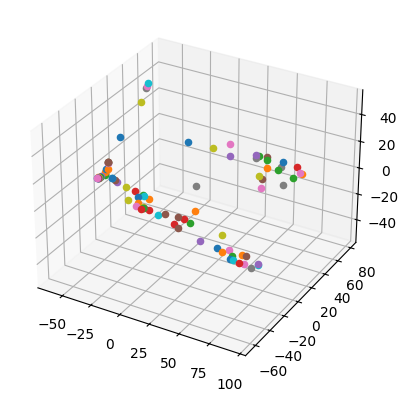

In [26]:
# Graphing
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


for i in range(len(reduced_councillor_df)):
    point = reduced_councillor_df[i,0], reduced_councillor_df[i,1], reduced_councillor_df[i,2]
    ax.scatter(*point)
    # ax.text(*point, councillor_df.iloc[i].name)

plt.show()

## Clustering

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto").fit(reduced_councillor_df)
kmeans.labels_


array([1, 0, 2, 0, 1, 4, 2, 2, 4, 2, 0, 1, 1, 4, 0, 1, 0, 0, 4, 0, 2, 2,
       4, 4, 2, 2, 4, 0, 1, 4, 0, 1, 0, 2, 0, 4, 1, 1, 0, 0, 2, 4, 1, 4,
       0, 4, 2, 1, 2, 2, 4, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1], dtype=int32)

In [42]:
import plotly.express as px
import plotly.graph_objects as go

# Prepare for visualization
headers = ['councillor', 'x', 'y', 'z', 'cluster', 'mayor']
plotly_rows = []
past_mayors = 'Olivia Chow', 'John Tory', 'Rob Ford', 'David Miller'
for i, name in enumerate(rows):
    row = [name] + list(reduced_councillor_df[i])
    row.append(kmeans.labels_[i])
    row.append('Was mayor' if name in past_mayors else 'Was not mayor')
    plotly_rows.append(row)
plotly_df = pd.DataFrame(plotly_rows, columns=headers)
del plotly_rows, headers

# Plot
fig = go.Figure(px.scatter_3d(
    plotly_df, x='x', y='y', z='z', hover_name='councillor', hover_data={'x': False, 'y': False, 'z': False}, color='cluster', symbol='mayor', title='Toronto City Councillors by Voting Record',
    opacity = 0.75,
    # width=800,
    height=500,
    labels={
        'x': '',
        'y': '',
        'z': ''
    },
    category_orders={'mayor': ['Was mayor', 'Was not mayor']}
))
fig.update_layout(
    scene={
        'xaxis': {
            'nticks': 1,
            'tickfont': {'size': 1}
        }
    },
    legend={
        'yanchor': 'top',
        'y': 0.95,
        'xanchor': 'left',
        'x': 0.05,
        'title': 'Legend'
    },
    # legend_title_text="Was mayor?"
    # showlegend=False
)

fig.show()

In [15]:
plotly_df.to_csv("output/plotly_df.csv")

## Try 2D

In [27]:
pca = PCA(n_components=2)
pca.fit(councillor_df)
reduced_councillor_df = pca.transform(councillor_df)
reduced_councillor_df[:10]

array([[ 77.02632139,  22.19760375],
       [-57.56500086, -14.18898116],
       [ 59.15672247, -16.98256536],
       [-56.96623483, -16.15862067],
       [ 64.77246078,   3.91665639],
       [ 32.50265623, -46.4893434 ],
       [ 69.41096725, -17.90910851],
       [ 74.0487915 , -16.13204194],
       [ 11.60785339, -59.58468167],
       [ 61.81976312, -20.13134851]])

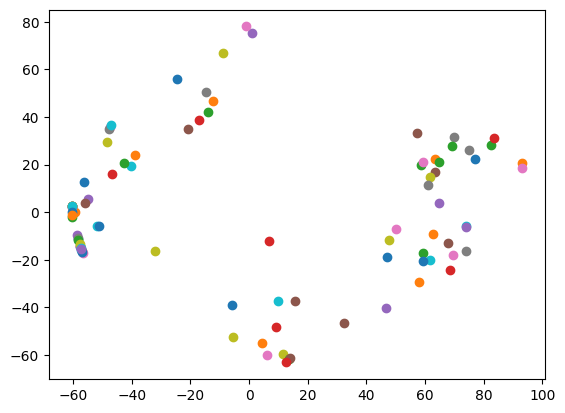

In [28]:
# Graphing
fig = plt.figure()
ax = fig.add_subplot()


for i in range(len(reduced_councillor_df)):
    point = reduced_councillor_df[i,0], reduced_councillor_df[i,1]
    ax.scatter(*point)

plt.show()

In [33]:
# Prepare for visualization
headers = ['councillor', 'x', 'y', 'cluster', 'mayor']
plotly_rows = []
past_mayors = 'Olivia Chow', 'John Tory', 'Rob Ford', 'David Miller'
for i, name in enumerate(rows):
    row = [name] + list(reduced_councillor_df[i])
    row.append(kmeans.labels_[i])
    row.append('Was mayor' if name in past_mayors else 'Was not mayor')
    plotly_rows.append(row)
plotly_df = pd.DataFrame(plotly_rows, columns=headers)
del plotly_rows, headers

# Plot
fig = go.Figure(px.scatter(
    plotly_df, x='x', y='y', hover_name='councillor', hover_data={'x': False, 'y': False}, color='cluster', symbol='mayor', title='Toronto City Councillors by Voting Record',
    opacity = 0.5,
    # width=800,
    height=500,
    labels={
        'x': '',
        'y': '',
    },
    category_orders={'mayor': ['Was mayor', 'Was not mayor']}
))
fig.update_layout(
    scene={
        'xaxis': {
            'nticks': 1,
            'tickfont': {'size': 1}
        },
        'yaxis': {
            'nticks': 1,
            'tickfont': {'size': 1}
        },
    },
    legend={
        'yanchor': 'top',
        'y': 0.95,
        'xanchor': 'left',
        'x': 0.05,
        'title': 'Legend'
    },
    # legend_title_text="Was mayor?"
    # showlegend=False
)

fig.show()

# Compare numericalization methods
Code copied and based on the above

In [3]:
# Read each file
rows_method_1 = {}  # Councillor[str] -> Votes[list]
rows_method_2 = {}  # Councillor[str] -> Votes[list]
rows_method_3 = {}  # Councillor[str] -> Votes[list]
indices = {}  # Voting item[str] -> Index[int]
next_index = 0

# First pass: Obtain set of Agenda Items
for filename in tqdm(records, desc='Loading Agenda Items', position=0):
    with open(filename, 'r', encoding='utf-8', newline='') as file:
        reader = csv.DictReader(file)
        for row in tqdm(reader, position=1):
            assert row['Agenda Item #'], row
            if row['Agenda Item #'] not in indices:
                indices[row['Agenda Item #']] = next_index
                next_index += 1
print("Found", len(indices), "unique Agenda Items.")

# Second pass: Obtain councillor votes
for filename in tqdm(records, desc='Loading Councillor Votes', position=0):
    with open(filename, 'r', encoding='utf-8', newline='') as file:
        reader = csv.DictReader(file)
        for row in tqdm(reader, position=1):

            assert row['First Name'], row
            assert row['Last Name'], row
            assert row['Vote'], row

            name = f"{row['First Name'].strip()} {row['Last Name'].strip()}"
            index = indices[row['Agenda Item #']]

            # Initialize councillor
            """
            Method 1:
                Yes: 1.0
                No: 0.0
                Absent: -1.0
                N/A: -1.0 (similar results with -2)

            Method 2:
                Yes: 1.0
                No: 0.0
                Absent: 0.5
                N/A: -1.0

            Method 3:
                Yes: 1.0
                No: 0.0
                Absent: 0.5
                N/A: 0.5
            """
            # N/A vote
            if name not in rows_method_1:  # All rows_ dicts should have the same names, so just check one
                rows_method_1[name] = [-1.0 for __ in range(len(indices))]
                rows_method_2[name] = [-1.0 for __ in range(len(indices))]
                rows_method_3[name] = [0.5 for __ in range(len(indices))]

            # Other votes
            if row['Vote'] == 'Yes':
                rows_method_1[name][index] = 1.
                rows_method_2[name][index] = 1.
                rows_method_3[name][index] = 1.
            elif row['Vote'] == 'No':
                rows_method_1[name][index] = 0.
                rows_method_2[name][index] = 0.
                rows_method_3[name][index] = 0.
            elif row['Vote'] == 'Absent':
                rows_method_1[name][index] = -1.
                rows_method_2[name][index] = 0.5
                rows_method_3[name][index] = 0.5
            else:
                raise ValueError(f"Invalid vote type: {row['Vote']}")

# Correct encoding issue with Ana Bailão
rows_method_1['Ana Bailão'] = rows_method_1['Ana BailÃ£o']
rows_method_2['Ana Bailão'] = rows_method_2['Ana BailÃ£o']
rows_method_3['Ana Bailão'] = rows_method_3['Ana BailÃ£o']
del rows_method_1['Ana BailÃ£o']
del rows_method_2['Ana BailÃ£o']
del rows_method_3['Ana BailÃ£o']

print("Votes tallied.")

Loading Agenda Items:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Found 8708 unique Agenda Items.


Loading Councillor Votes:   0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Votes tallied.


In [4]:
# Convert to DataFrame
councillor_df_method_1 = pd.DataFrame(
    [rows_method_1[name] for name in rows_method_1],
    columns=[agenda_item for agenda_item in indices],
    index=[name for name in rows_method_1]
)
councillor_df_method_2 = pd.DataFrame(
    [rows_method_2[name] for name in rows_method_2],
    columns=[agenda_item for agenda_item in indices],
    index=[name for name in rows_method_1]
)
councillor_df_method_3 = pd.DataFrame(
    [rows_method_3[name] for name in rows_method_3],
    columns=[agenda_item for agenda_item in indices],
    index=[name for name in rows_method_1]
)

In [6]:
from sklearn.decomposition import PCA

# Reduce dimensionality
pca = PCA(n_components=3)
pca.fit(councillor_df_method_1)
reduced_councillor_df_method_1 = pca.transform(councillor_df_method_1)

pca = PCA(n_components=3)
pca.fit(councillor_df_method_2)
reduced_councillor_df_method_2 = pca.transform(councillor_df_method_2)

pca = PCA(n_components=3)
pca.fit(councillor_df_method_3)
reduced_councillor_df_method_3 = pca.transform(councillor_df_method_3)

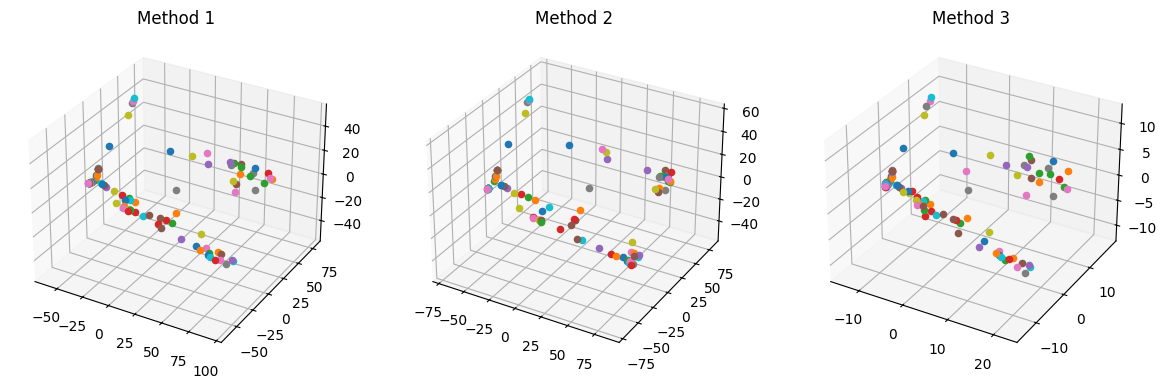

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=plt.figaspect(0.33))

ax = fig.add_subplot(1,3,1, projection='3d')
# axs[0] = fig.add_subplot(projection='3d')
for i in range(len(reduced_councillor_df_method_1)):
    point = reduced_councillor_df_method_1[i,0], reduced_councillor_df_method_1[i,1], reduced_councillor_df_method_1[i,2]
    ax.scatter(*point)
    ax.set_title("Method 1")

ax = fig.add_subplot(1,3,2, projection='3d')
for i in range(len(reduced_councillor_df_method_2)):
    point = reduced_councillor_df_method_2[i,0], reduced_councillor_df_method_2[i,1], reduced_councillor_df_method_2[i,2]
    ax.scatter(*point)
    ax.set_title("Method 2")

ax = fig.add_subplot(1,3,3, projection='3d')
for i in range(len(reduced_councillor_df_method_3)):
    point = reduced_councillor_df_method_3[i,0], reduced_councillor_df_method_3[i,1], reduced_councillor_df_method_3[i,2]
    ax.scatter(*point)
    ax.set_title("Method 3")

plt.show()

In [13]:
for name in councillor_df_method_1.index:
    print(name)

Paul Ainslie
Brian Ashton
Maria Augimeri
Sandra Bussin
Shelley Carroll
Raymond Cho
Janet Davis
Glenn De Baeremaeker
Mike Del Grande
Frank Di Giorgio
Mike Feldman
John Filion
Paula Fletcher
Rob Ford
Adam Giambrone
Mark Grimes
Suzan Hall
A.A. Heaps
Doug Holyday
Cliff Jenkins
Norman Kelly
Chin Lee
Gloria Lindsay Luby
Giorgio Mammoliti
Pam McConnell
Joe Mihevc
Peter Milczyn
David Miller
Denzil Minnan-Wong
Ron Moeser
Howard Moscoe
Frances Nunziata
Case Ootes
Cesar Palacio
Joe Pantalone
John Parker
Gord Perks
Anthony Perruzza
Kyle Rae
Bill Saundercook
David Shiner
Karen Stintz
Michael Thompson
Adam Vaughan
Michael Walker
Michelle Berardinetti
Josh Colle
Gary Crawford
Vincent Crisanti
Sarah Doucette
Doug Ford
Mary Fragedakis
Mike Layton
Josh Matlow
Mary-Margaret McMahon
James Pasternak
Jaye Robinson
Kristyn Wong-Tam
Peter Leon
James Maloney
Ceta Ramkhalawansingh
Jon Burnside
John Campbell
Christin Carmichael Greb
Joe Cressy
Justin J. Di Ciano
Stephen Holyday
Jim Karygiannis
John Tory
Michelle

In [17]:
councillor_df_method_1.loc['Paul Ainslie'].isin([-1.]).all()

False